In [45]:
import pandas as pd
import numpy as np

In [46]:
crop = pd.read_csv("D:/crop_project/Crop_recommendation.csv")

In [47]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [48]:
crop.shape

(2200, 8)

In [49]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [50]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [51]:
crop.duplicated().sum()

np.int64(0)

In [52]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [53]:
# Select only the numeric columns
numeric_crop = crop.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = numeric_crop.corr()
print(correlation_matrix)


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_crop = crop.select_dtypes(include=[float, int])
correlation_matrix = numeric_crop.corr()


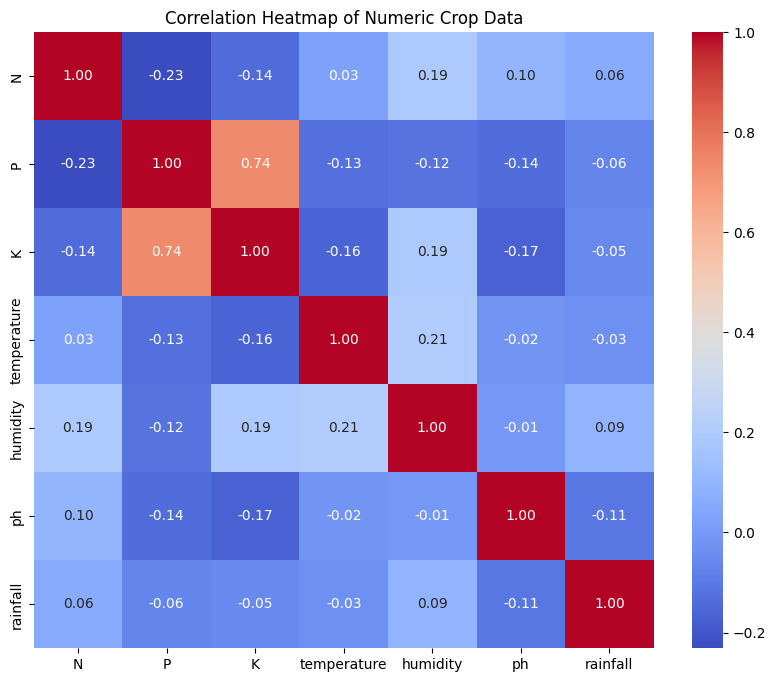

In [55]:
# Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap='coolwarm', fmt='.2f')

# Show the heatmap
plt.title('Correlation Heatmap of Numeric Crop Data')
plt.show()


In [56]:
# Check for non-numeric columns
non_numeric_columns = crop.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['label'], dtype='object')


In [57]:
crop.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [58]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [59]:
crop_dict={
    'rice' : 1,
    'maize' : 2,
    'chickpea' :3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}
crop['label']= crop['label'].map(crop_dict)

In [60]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [61]:
crop.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [62]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [63]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [64]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [65]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape

(1760, 7)

In [68]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [69]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [73]:
performance_metrics = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multi-class
    
    # Print metrics
    print(f"{name} model performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("-" * 40)
    
    # Store metrics for future analysis
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

LogisticRegression model performance:
  Accuracy: 0.9636
  Precision: 0.9644
  Recall: 0.9636
  F1-score: 0.9635
----------------------------------------
GaussianNB model performance:
  Accuracy: 0.9955
  Precision: 0.9958
  Recall: 0.9955
  F1-score: 0.9954
----------------------------------------
SVC model performance:
  Accuracy: 0.9682
  Precision: 0.9715
  Recall: 0.9682
  F1-score: 0.9680
----------------------------------------
KNeighborsClassifier model performance:
  Accuracy: 0.9659
  Precision: 0.9705
  Recall: 0.9659
  F1-score: 0.9659
----------------------------------------
DecisionTreeClassifier model performance:
  Accuracy: 0.9864
  Precision: 0.9868
  Recall: 0.9864
  F1-score: 0.9863
----------------------------------------
ExtraTreeClassifier model performance:
  Accuracy: 0.9295
  Precision: 0.9366
  Recall: 0.9295
  F1-score: 0.9302
----------------------------------------
RandomForestClassifier model performance:
  Accuracy: 0.9932
  Precision: 0.9937
  Recall: 0

c:\Users\SIVARAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model performance:
  Accuracy: 0.0955
  Precision: 0.0514
  Recall: 0.0955
  F1-score: 0.0575
----------------------------------------


c:\Users\SIVARAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


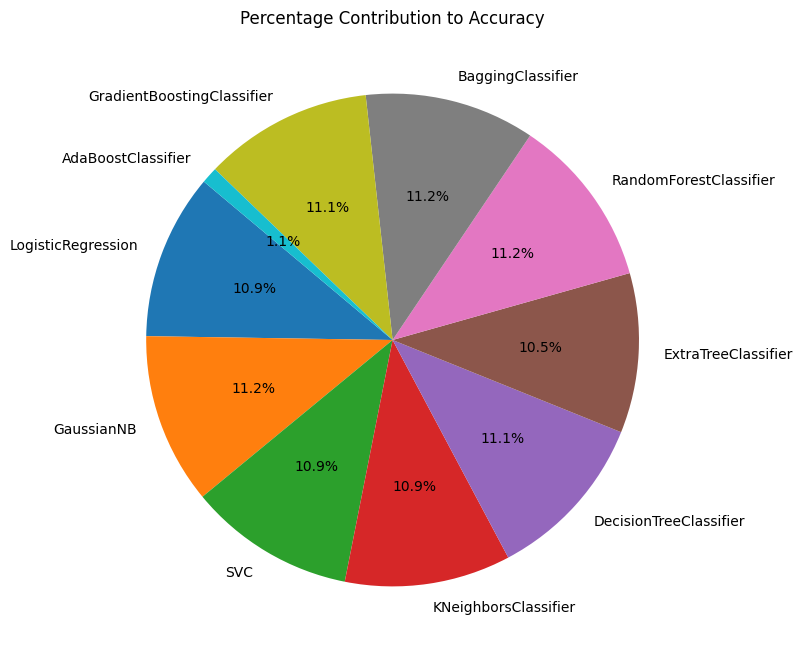

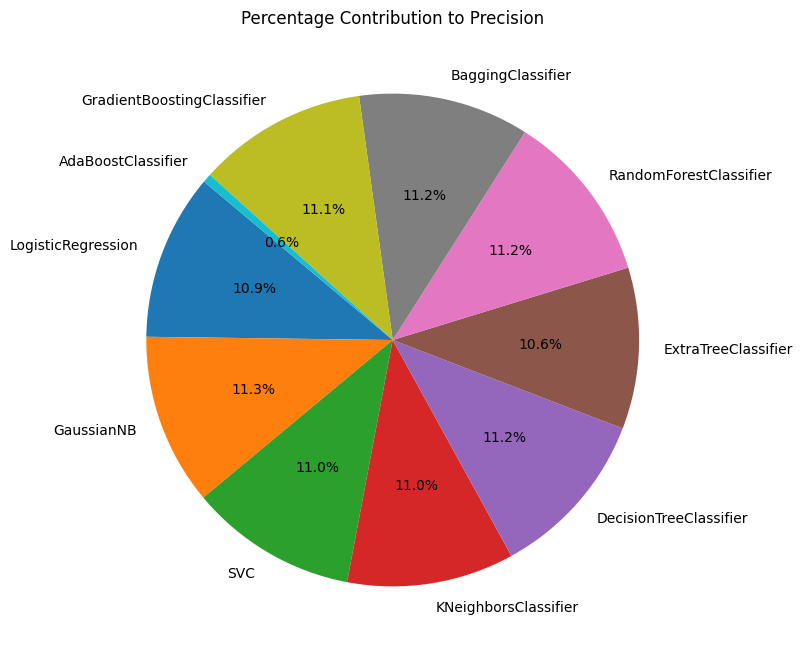

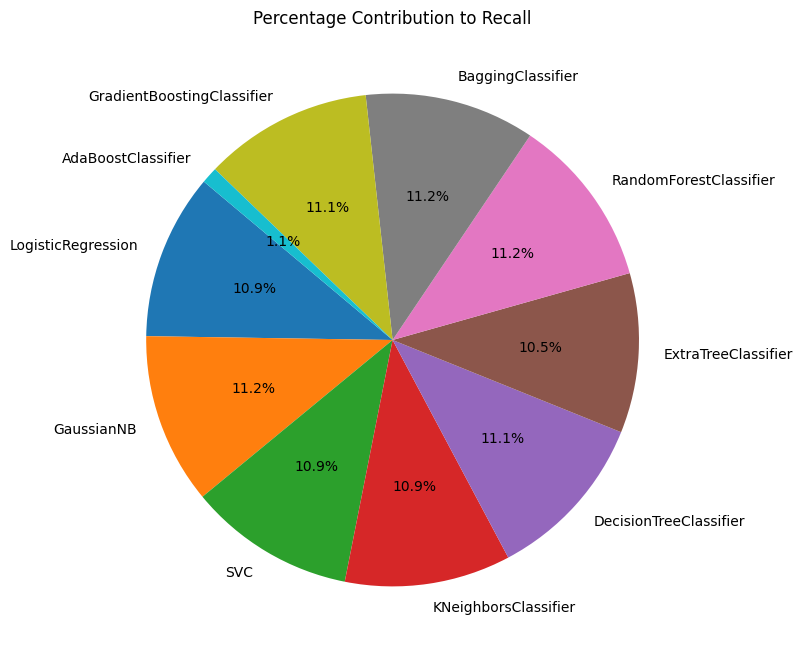

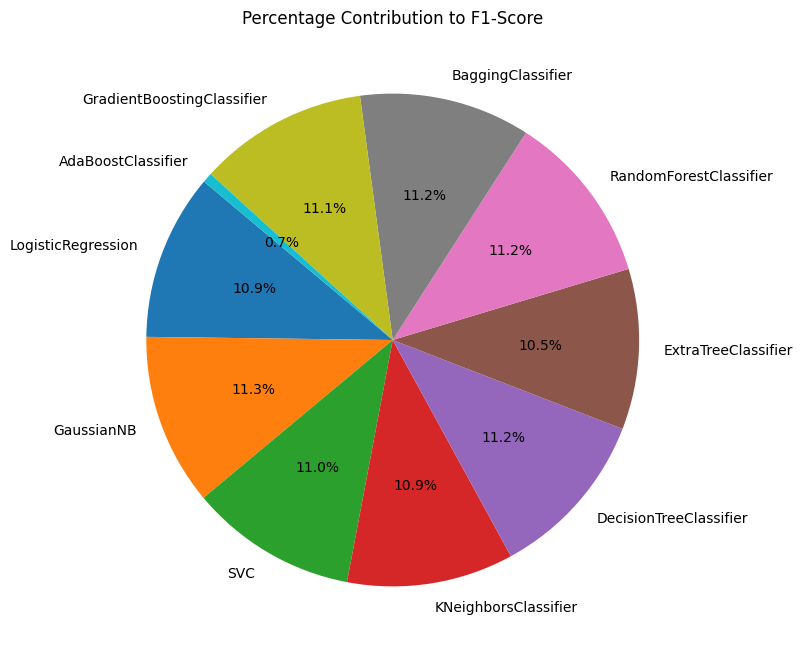

In [74]:
import matplotlib.pyplot as plt

# Define function to plot pie chart for a given metric
def plot_pie_chart(metric_name, metric_values, labels):
    plt.figure(figsize=(8, 8))
    plt.pie(metric_values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage Contribution to {metric_name}')
    plt.show()

# Extract metrics and model names
model_names = list(performance_metrics.keys())
accuracies = [performance_metrics[model]['Accuracy'] for model in model_names]
precisions = [performance_metrics[model]['Precision'] for model in model_names]
recalls = [performance_metrics[model]['Recall'] for model in model_names]
f1_scores = [performance_metrics[model]['F1-score'] for model in model_names]

# Plot pie charts for each metric
plot_pie_chart("Accuracy", accuracies, model_names)
plot_pie_chart("Precision", precisions, model_names)
plot_pie_chart("Recall", recalls, model_names)
plot_pie_chart("F1-Score", f1_scores, model_names)


In [75]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [76]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [77]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [78]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [79]:
N=90	
P=42	
K=43
temperature=40.0
humidity=22
ph=7
rainfall=202
predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [80]:
predict

array([18])

In [81]:
import pickle
pickle.dump(randclf, open('model.pkl','wb'))
pickle.dump(mx, open('minmaxscaler.pkl','wb'))
pickle.dump(sc, open('standscaler.pkl','wb'))